In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline

import os
print(os.listdir("../input"))

['Chicago_Crimes_2012_to_2017.csv']


In [4]:
df = pd.read_csv('../input/Chicago_Crimes_2012_to_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


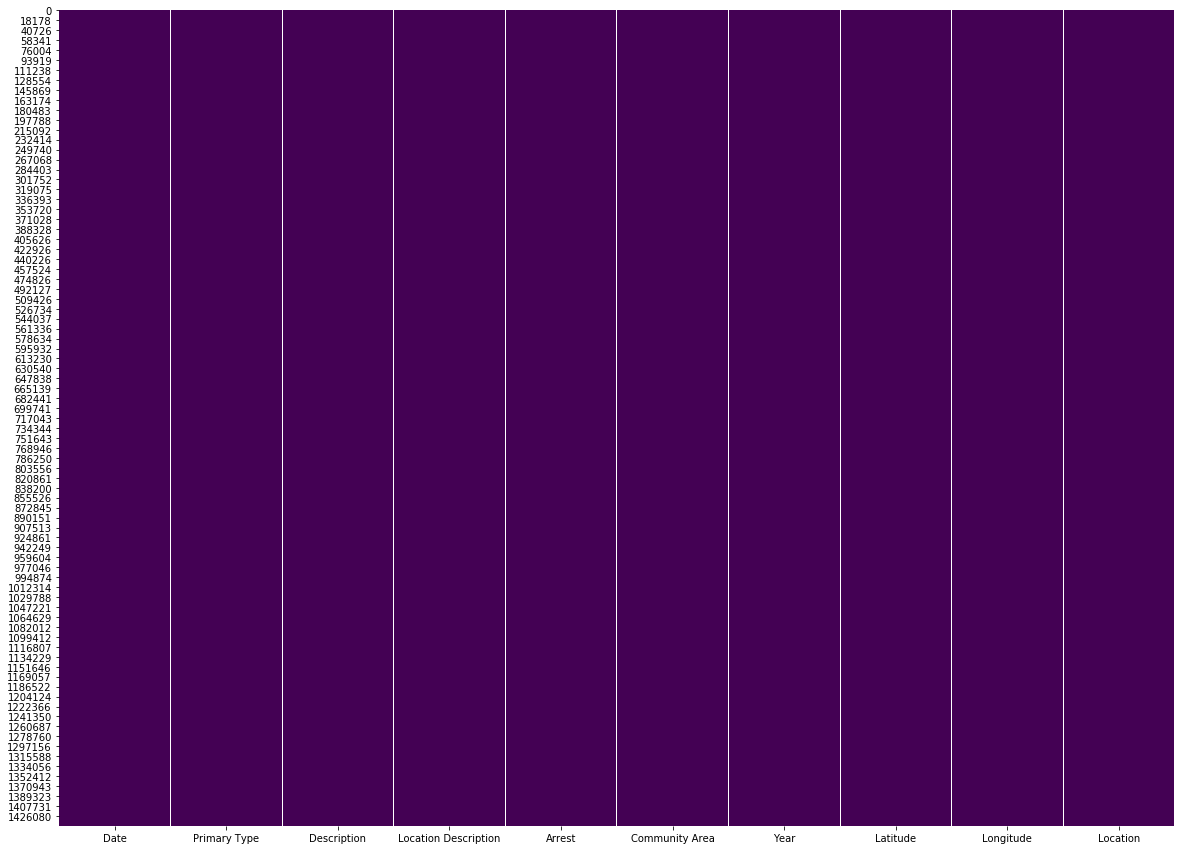

In [11]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [5]:
df = df.dropna()
df = df.drop(columns = ['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 10 columns):
Date                    1418365 non-null object
Primary Type            1418365 non-null object
Description             1418365 non-null object
Location Description    1418365 non-null object
Arrest                  1418365 non-null bool
Community Area          1418365 non-null float64
Year                    1418365 non-null int64
Latitude                1418365 non-null float64
Longitude               1418365 non-null float64
Location                1418365 non-null object
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 109.6+ MB


In [13]:
df.describe()

,Community Area,Year,Latitude,Longitude
count,1.418365e+06,1.418365e+06,1.418365e+06,1.418365e+06
mean,3.747455e+01,2.013851e+03,4.184144e+01,-8.767223e+01
std,2.142995e+01,1.423228e+00,9.399956e-02,6.637181e-02
min,0.000000e+00,2.012000e+03,3.661945e+01,-9.168657e+01
25%,2.300000e+01,2.013000e+03,4.176784e+01,-8.771529e+01
50%,3.200000e+01,2.014000e+03,4.185787e+01,-8.766614e+01
75%,5.700000e+01,2.015000e+03,4.190524e+01,-8.762812e+01
max,7.700000e+01,2.017000e+03,4.202271e+01,-8.752453e+01


In [14]:
df['Location Description'].value_counts().iloc[:15]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
Name: Location Description, dtype: int64

In [15]:
df['Primary Type'].value_counts().iloc[:15]

THEFT                         321950
BATTERY                       258941
CRIMINAL DAMAGE               152812
NARCOTICS                     131177
ASSAULT                        89508
OTHER OFFENSE                  85361
BURGLARY                       81668
DECEPTIVE PRACTICE             67609
MOTOR VEHICLE THEFT            59856
ROBBERY                        56092
CRIMINAL TRESPASS              36429
WEAPONS VIOLATION              16983
PUBLIC PEACE VIOLATION         13015
OFFENSE INVOLVING CHILDREN     10590
PROSTITUTION                    7567
Name: Primary Type, dtype: int64

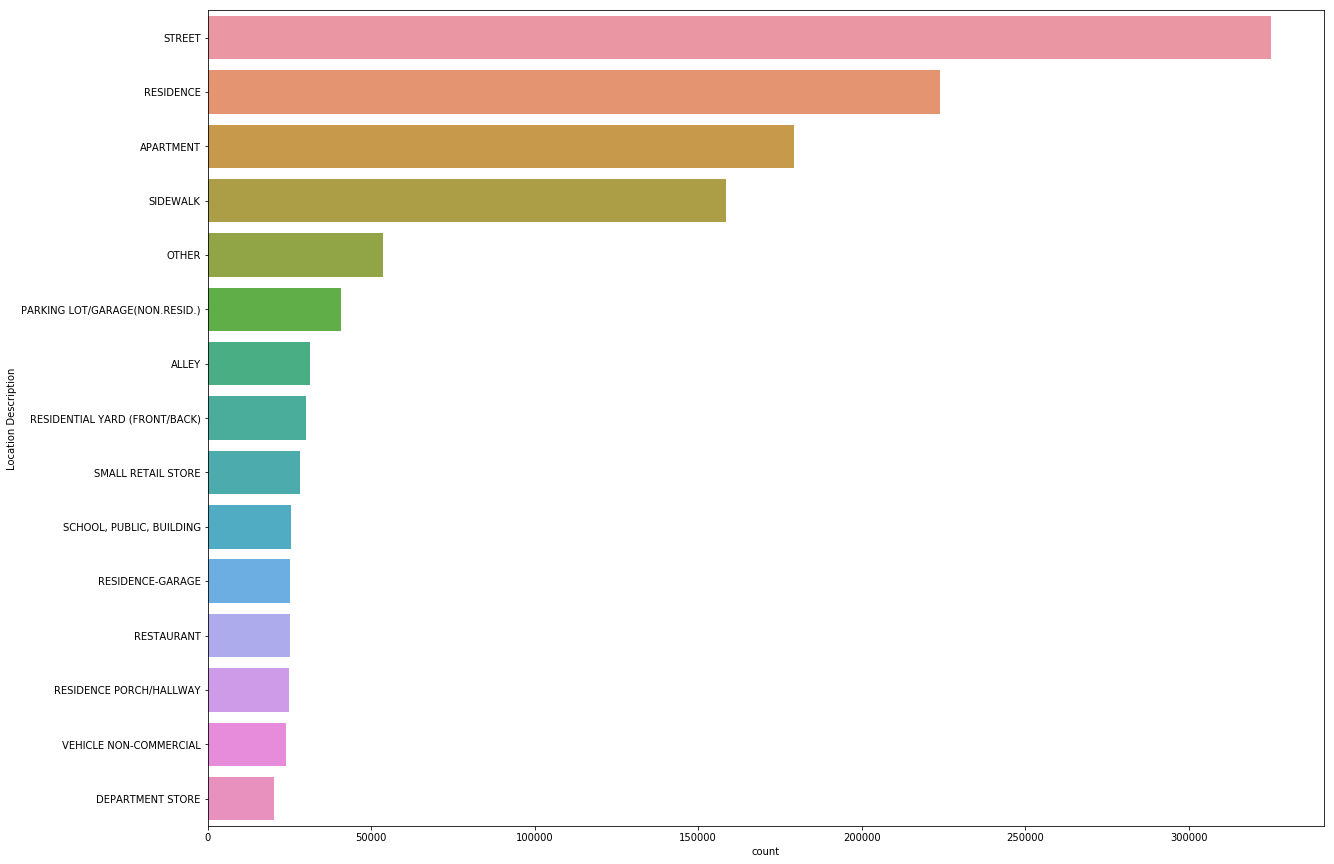

In [16]:
plt.figure(figsize = (20, 15))
sns.countplot(y = 'Location Description', data = df, order = df['Location Description'].value_counts().iloc[:15].index)

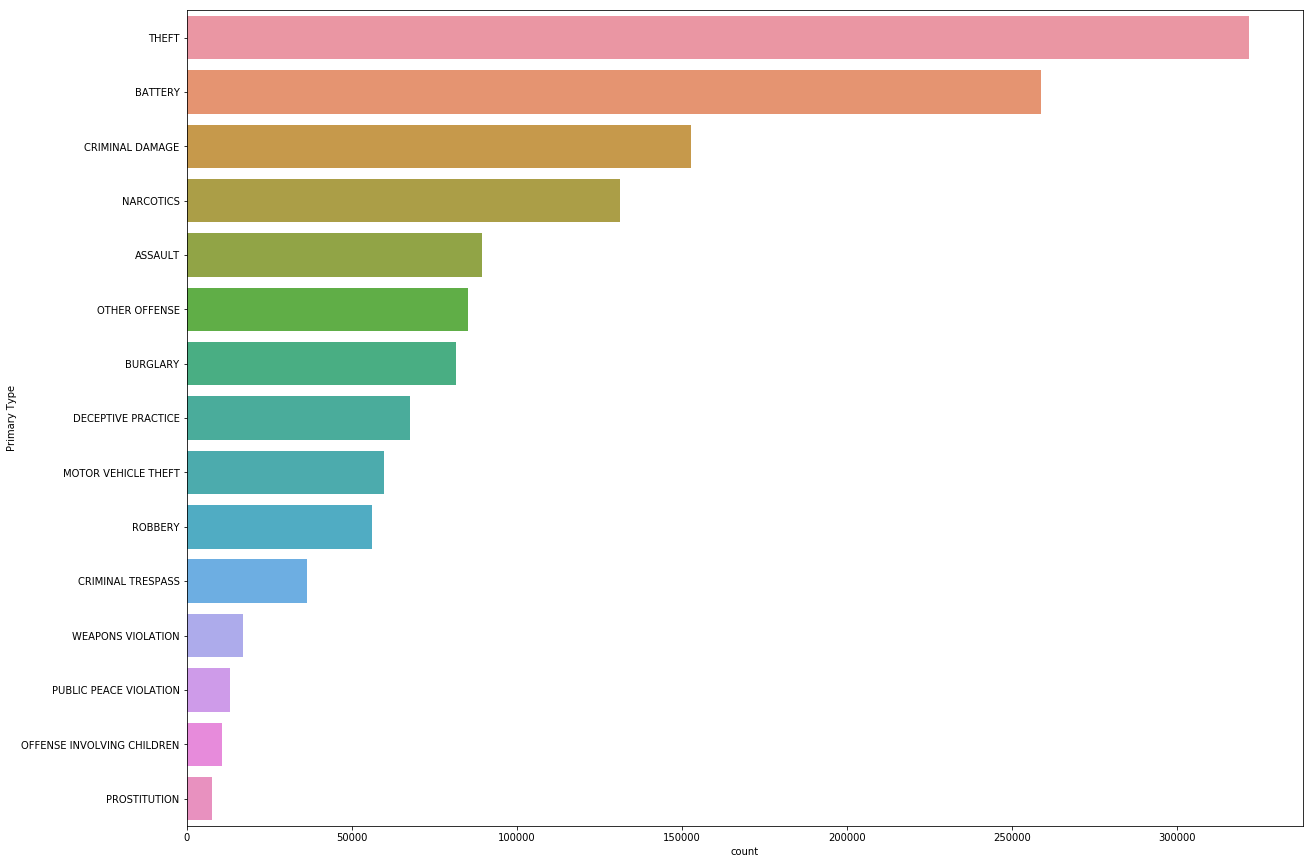

In [17]:
plt.figure(figsize = (20, 15))
sns.countplot(y = 'Primary Type', data = df, order = df['Primary Type'].value_counts().iloc[:15].index)

In [18]:
chicago_map = folium.Map(location = [41.864073, -87.706819], zoom_start = 9, tiles = 'CartoDB dark_matter')
chicago_map

In [19]:
locations = df.groupby('Community Area').first()
locations.head()

,Date,Primary Type,Description,Location Description,Arrest,Year,Latitude,Longitude,Location
Community Area,,,,,,,,,
0.0,02/19/2012 06:54:00 PM,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,2012,41.799090,-87.790549,"(41.799089601, -87.790549465)"
1.0,05/03/2016 04:00:00 PM,BATTERY,SIMPLE,SIDEWALK,False,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)"
2.0,05/03/2016 10:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,2016,41.999731,-87.705810,"(41.99973106, -87.705809711)"
3.0,05/03/2016 09:35:00 PM,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,2016,41.972843,-87.671127,"(41.972843435, -87.671127232)"
4.0,05/04/2016 12:01:00 AM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),False,2016,41.981316,-87.695119,"(41.9813162, -87.695118674)"


In [20]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


In [21]:
for loc in range(len(new_locations)):
    lat = new_locations.iloc[loc][0]
    long = new_locations.iloc[loc][1]
    
    popup_text = """Community Index : {} <br><br>
                    Arrest: {} <br><br>
                    Location Description : {}"""
    
    popup_text = popup_text.format(new_locations.index[loc], new_locations.iloc[loc][-1], new_locations.iloc[loc][-2])
    
    folium.CircleMarker(location = [lat, long], radius = 5, popup = popup_text, fill = True).add_to(chicago_map)

In [22]:
chicago_map

In [6]:
unique_locations = df['Location'].value_counts()
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [7]:
def location_extractor(String):
    
    coordinates = String[1:-1].split(',')
    lat = coordinates[0]
    long = coordinates[1]
    
    return lat, long

CR_index['LocationCoord'] = CR_index['Raw_String'].apply(location_extractor)
CR_index = CR_index.drop(columns = ['Raw_String'], axis = 1)
CR_index.head()

,ValueCount,LocationCoord
0,2093,"(41.883500187, -87.627876698)"
1,2082,"(41.754592961, -87.741528537)"
2,1338,"(41.979006297, -87.906463155)"
3,1319,"(41.897895128, -87.624096605)"
4,1122,"(41.742710224, -87.634088181)"


In [8]:
chicago_crime_map = folium.Map(location = [41.864073, -87.706819], zoom_start = 9, tiles = 'CartoDB dark_matter')

In [23]:
%%time

for i in range(500):
    lat = float(CR_index['LocationCoord'].iloc[i][0])
    long = float(CR_index['LocationCoord'].iloc[i][1])
    radius = float(CR_index['ValueCount'].iloc[i]) / 100
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_crime_map)

CPU times: user 128 ms, sys: 8 ms, total: 136 ms
Wall time: 195 ms


In [24]:
chicago_crime_map